In [1]:
cd ..

/home/sallinen/Programmation/predicting-poverty-through-time/src


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from lib import estimator_util as eu
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
from lib import clusters_utils as cl

In [4]:
sns.set_theme()

In [5]:
complete_df, all_cols = eu.get_data("../data/lsms/processed/_all_real.csv", "../data/cnn_features/resnet_trans_all_countries_hyper.csv", "../data/")

In [6]:
all_cols

['building_count',
 'building_area',
 'building_density',
 'residential_count',
 'residential_area',
 'residential_density',
 'industry_count',
 'industry_area',
 'industry_density',
 'education_count',
 'education_area',
 'education_density',
 'health_count',
 'health_area',
 'health_density',
 'library',
 'hostel',
 'car_rental',
 'shelter',
 'furniture_shop',
 'water_works',
 'bar',
 'post_box',
 'tourist_info',
 'pub',
 'laundry',
 'water_tower',
 'tower',
 'community_centre',
 'nightclub',
 'college',
 'cafe',
 'bench',
 'gift_shop',
 'mobile_phone_shop',
 'hotel',
 'pharmacy',
 'bank',
 'fast_food',
 'car_dealership',
 'computer_shop',
 'bakery',
 'toilet',
 'clothes',
 'park',
 'department_store',
 'supermarket',
 'chalet',
 'memorial',
 'prison',
 'cinema',
 'travel_agent',
 'track',
 'waste_basket',
 'guesthouse',
 'school',
 'monument',
 'graveyard',
 'motel',
 'university',
 'greengrocer',
 'mall',
 'playground',
 'chemist',
 'police',
 'telephone',
 'picnic_site',
 'public_

In [7]:
countries = ["NG", "ETH" ,"TZA", "MW"]

# Study OSM feature importance with PCA

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=1)
_ = pca.fit(complete_df[all_cols])
features_weights = list(zip(all_cols, pca.components_.T))

In [9]:
features_weights

[('building_count', array([0.0002475])),
 ('building_area', array([0.03081713])),
 ('building_density', array([0.00072326])),
 ('residential_count', array([2.44180151e-06])),
 ('residential_area', array([0.99908656])),
 ('residential_density', array([0.02293087])),
 ('industry_count', array([-0.])),
 ('industry_area', array([-0.])),
 ('industry_density', array([-0.])),
 ('education_count', array([4.74305583e-07])),
 ('education_area', array([0.01100004])),
 ('education_density', array([0.00025471])),
 ('health_count', array([2.92826512e-07])),
 ('health_area', array([0.00160218])),
 ('health_density', array([3.70067818e-05])),
 ('library', array([2.32403877e-08])),
 ('hostel', array([0.])),
 ('car_rental', array([9.71976631e-09])),
 ('shelter', array([1.04878982e-08])),
 ('furniture_shop', array([0.])),
 ('water_works', array([0.])),
 ('bar', array([1.47144749e-07])),
 ('post_box', array([1.0230009e-09])),
 ('tourist_info', array([0.])),
 ('pub', array([1.71661943e-08])),
 ('laundry', 

# Study OSM features for every countries at once

In [10]:
X, y, year_df, osm_X = eu.get_recent_osm_features(complete_df, countries, all_cols)

### With OSM features non standardized

In [11]:
osm_X = pd.DataFrame(osm_X, columns = all_cols)

In [12]:
osm_X.describe()

,building_count,building_area,building_density,residential_count,residential_area,residential_density,industry_count,industry_area,industry_density,education_count,...,density_trunk,density_residential,density_pedestrian,density_service,density_primary,density_intersection,density_secondary,density_living_street,density_track,density_tertiary
count,708.000000,7.080000e+02,708.000000,708.000000,7.080000e+02,708.000000,708.0,708.0,708.0,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.0,708.000000,708.000000,708.000000,708.000000
mean,4233.816384,3.406160e+05,8084.409195,50.451977,3.057171e+06,72582.430071,0.0,0.0,0.0,1.415254,...,67.339506,1458.442218,0.008658,40.726172,14.865395,0.0,48.709703,0.011949,389.658291,148.130636
std,8958.123950,8.079813e+05,19190.899574,154.444267,6.092496e+06,144489.825119,0.0,0.0,0.0,3.300147,...,98.133517,1483.056368,0.230380,112.014788,45.307875,0.0,79.831634,0.271914,787.620345,152.854962
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,537.735000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.495000,0.000000
50%,257.000000,1.537306e+04,365.385000,3.000000,2.135521e+05,5112.465000,0.0,0.0,0.0,0.000000,...,0.000000,1017.640000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,112.145000,120.565000
75%,3289.250000,1.533974e+05,3702.365000,34.000000,2.624780e+06,62137.725000,0.0,0.0,0.0,1.000000,...,154.785000,1695.800000,0.000000,7.965000,0.000000,0.0,84.457500,0.000000,509.765000,235.752500
max,50720.000000,4.662329e+06,110327.160000,1683.000000,3.801784e+07,899636.300000,0.0,0.0,0.0,24.000000,...,788.680000,8327.110000,6.130000,860.700000,278.470000,0.0,426.110000,7.110000,10142.040000,753.860000


### With OSM features standardized

In [13]:
X = pd.DataFrame(X, columns = all_cols)

In [14]:
#get the name of features filled with null values for all four countries
null_features = X.loc[:, (X == 0).any(axis=0)].keys()
print(null_features)

Index(['industry_count', 'industry_area', 'industry_density', 'hostel',
       'furniture_shop', 'water_works', 'tourist_info', 'laundry',
       'water_tower', 'tower', 'gift_shop', 'mobile_phone_shop', 'hotel',
       'car_dealership', 'computer_shop', 'bakery', 'toilet', 'clothes',
       'park', 'department_store', 'supermarket', 'chalet', 'memorial',
       'travel_agent', 'track', 'guesthouse', 'monument', 'graveyard', 'motel',
       'greengrocer', 'mall', 'playground', 'chemist', 'picnic_site',
       'doityourself', 'comms_tower', 'convenience', 'viewpoint', 'butcher',
       'museum', 'bookshop', 'camp_site', 'water_well', 'bicycle_shop',
       'outdoor_shop', 'camera_surveillance', 'sports_shop', 'stationery',
       'sports_centre', 'attraction', 'florist', 'artwork', 'jeweller',
       'stadium', 'hairdresser', 'beauty_shop', 'beverages', 'town_hall',
       'others', 'toy_shop', 'kiosk', 'shoe_shop', 'count_intersection',
       'length_intersection', 'density_intersecti

In [15]:
#remove all features filled with 0
X = X.loc[:, (X != 0).any(axis=0)]

In [16]:
X.describe()

,building_count,building_area,building_density,residential_count,residential_area,residential_density,education_count,education_area,education_density,health_count,...,length_tertiary,density_trunk,density_residential,density_pedestrian,density_service,density_primary,density_secondary,density_living_street,density_track,density_tertiary
count,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,...,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03
mean,-7.368658e-16,-8.656981e-16,1.427367e-15,-1.103012e-15,-3.062309e-16,2.575921e-16,-3.186568e-16,7.130666e-16,-2.307318e-17,8.463636e-16,...,-1.756805e-16,-1.243024e-15,5.532361e-17,2.927040e-16,-9.673072e-16,-1.838771e-15,1.732993e-15,-6.614030e-17,3.041317e-16,-1.789279e-15
std,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,...,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00
min,-2.741644e-01,-3.076249e-01,-3.059018e-01,-2.412358e-01,-4.773578e-01,-4.784063e-01,-2.395172e-01,-2.349695e-01,-2.348718e-01,-2.776115e-01,...,-8.076601e-01,-5.669686e-01,-6.064124e-01,-6.313024e-02,-3.511242e-01,-3.531864e-01,-5.046394e-01,-4.570284e-02,-3.189416e-01,-8.121570e-01
25%,-2.741644e-01,-3.076249e-01,-3.059018e-01,-2.412358e-01,-4.773578e-01,-4.784063e-01,-2.395172e-01,-2.349695e-01,-2.348718e-01,-2.776115e-01,...,-8.076601e-01,-5.669686e-01,-6.064124e-01,-6.313024e-02,-3.511242e-01,-3.531864e-01,-5.046394e-01,-4.570284e-02,-3.189416e-01,-8.121570e-01
50%,-2.739828e-01,-3.072294e-01,-3.055180e-01,-2.301748e-01,-4.746314e-01,-4.757137e-01,-2.395172e-01,-2.349695e-01,-2.348718e-01,-2.776115e-01,...,-2.948903e-01,-5.669686e-01,-4.287159e-01,-6.313024e-02,-3.511242e-01,-3.531864e-01,-5.046394e-01,-4.570284e-02,-3.009971e-01,-2.950449e-01
75%,-2.291744e-01,-2.248893e-01,-2.249073e-01,-1.416864e-01,-1.124389e-01,-1.134394e-01,-1.348994e-01,-2.349695e-01,-2.348718e-01,-1.020766e-01,...,4.381770e-01,5.945274e-01,3.765931e-02,-6.313024e-02,-2.498449e-01,-1.282504e-02,2.518738e-01,-4.570284e-02,-8.463724e-02,4.384761e-01
max,8.936299e+00,1.015308e+01,9.769922e+00,1.837450e+01,6.114982e+00,6.004509e+00,1.388388e+01,1.167167e+01,1.135517e+01,1.148323e+01,...,8.281263e+00,6.622972e+00,6.250190e+00,1.878703e+01,9.883539e+00,1.220056e+01,1.283733e+01,4.001663e+01,2.112996e+01,8.241919e+00


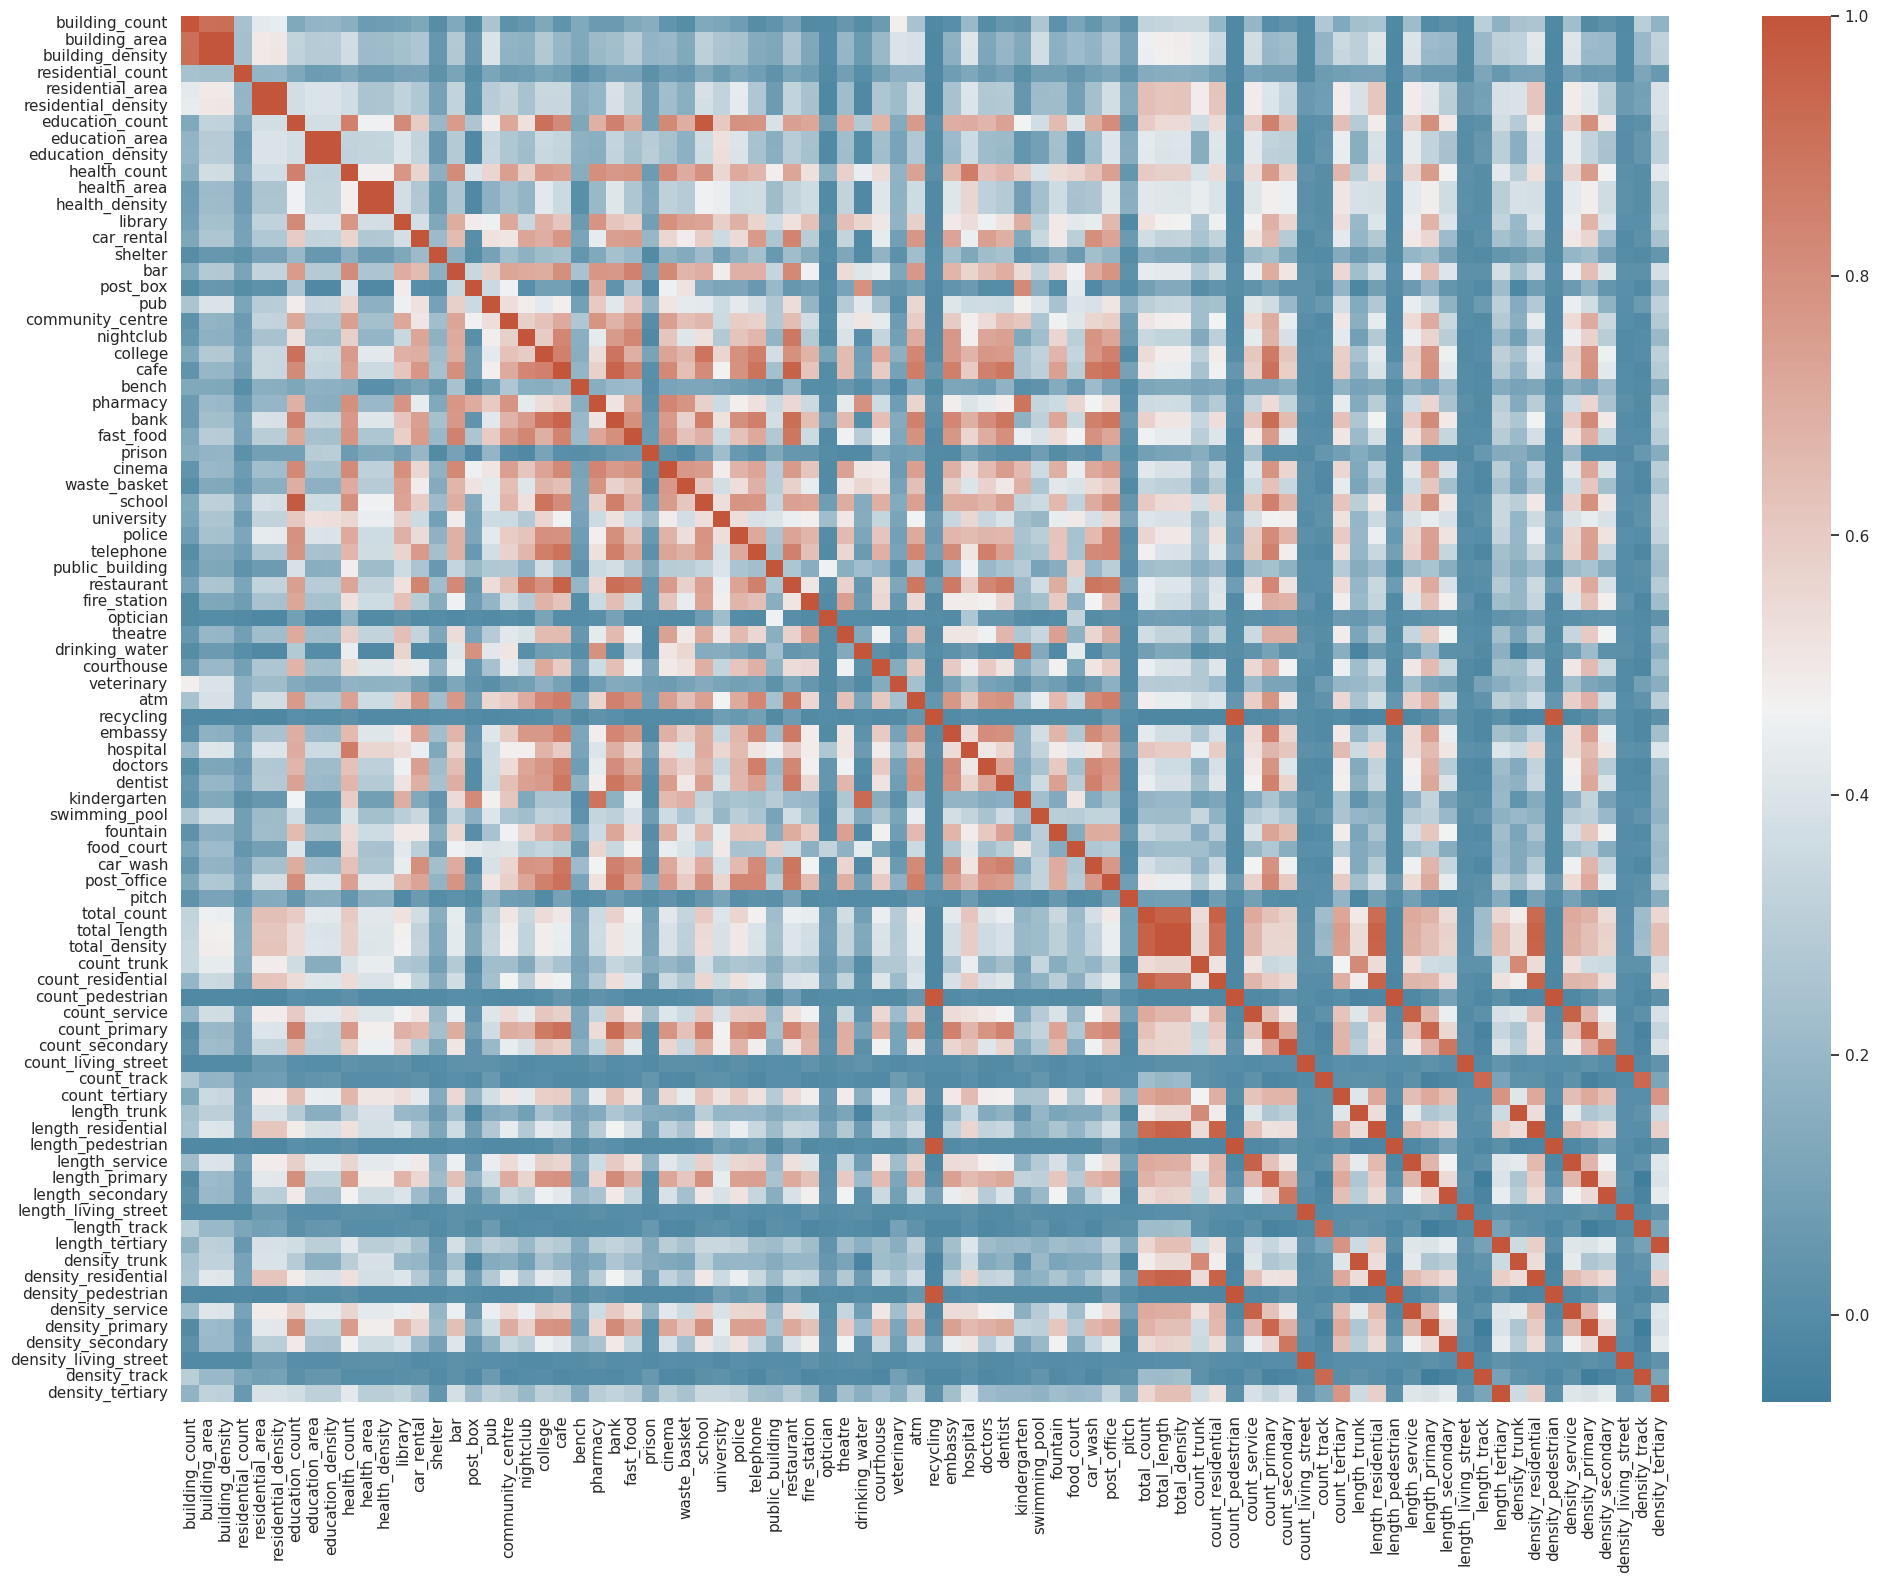

In [17]:
corr = X.corr()
f, ax = plt.subplots(figsize=(24, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#sns_plot = sns.heatmap(corr, cmap=cmap, annot=True, fmt='.2f', annot_kws={'size': 3})
sns_plot = sns.heatmap(corr, cmap=cmap)
sns_plot.figure.savefig("heatmap.png", dpi = 300)

# Study OSM features for each country

NG


,building_count,building_area,building_density,residential_count,residential_area,residential_density,industry_count,industry_area,industry_density,education_count,...,density_trunk,density_residential,density_pedestrian,density_service,density_primary,density_intersection,density_secondary,density_living_street,density_track,density_tertiary
count,651.000000,6.510000e+02,651.000000,651.000000,6.510000e+02,6.510000e+02,651.0,651.0,651.0,651.000000,...,651.000000,651.000000,651.0,651.000000,651.000000,651.0,651.000000,651.000000,651.000000,651.000000
mean,417.129032,1.111573e+05,2528.909662,7.861751,2.811006e+06,6.431870e+04,0.0,0.0,0.0,1.296467,...,90.572058,2687.780461,0.0,76.762888,138.679954,0.0,155.430676,0.175376,31.918126,241.197127
std,2036.916065,4.469707e+05,10198.242084,28.206643,7.428468e+06,1.697100e+05,0.0,0.0,0.0,5.954414,...,153.404067,3720.527252,0.0,165.758825,226.686407,0.0,262.263665,2.106644,95.054901,255.043463
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.000000,36.415000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,15.895000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.000000,710.880000,0.0,0.910000,0.000000,0.0,68.710000,0.000000,0.000000,169.380000
75%,52.000000,2.504652e+04,575.995000,4.000000,7.884633e+05,1.816603e+04,0.0,0.0,0.0,0.000000,...,159.870000,4687.445000,0.0,81.000000,185.815000,0.0,191.625000,0.000000,22.555000,359.615000
max,25719.000000,5.708910e+06,129307.730000,292.000000,4.416136e+07,1.002532e+06,0.0,0.0,0.0,105.000000,...,861.140000,20120.290000,0.0,1487.840000,1354.510000,0.0,2763.010000,30.040000,1071.500000,1429.720000


ETH


,building_count,building_area,building_density,residential_count,residential_area,residential_density,industry_count,industry_area,industry_density,education_count,...,density_trunk,density_residential,density_pedestrian,density_service,density_primary,density_intersection,density_secondary,density_living_street,density_track,density_tertiary
count,516.000000,5.160000e+02,516.000000,516.000000,5.160000e+02,516.000000,516.0,516.0,516.0,516.000000,...,516.000000,516.000000,516.00000,516.000000,516.000000,516.0,516.000000,516.0,516.000000,516.000000
mean,311.670543,1.018401e+05,2336.005969,16.368217,5.627771e+06,128945.135833,0.0,0.0,0.0,5.143411,...,65.642849,2139.294186,0.00469,135.908256,203.863120,0.0,143.372171,0.0,75.320446,174.743818
std,2190.184362,3.166133e+05,7264.311060,29.224276,7.575568e+06,173602.403321,0.0,0.0,0.0,17.240694,...,124.810520,3780.463104,0.09614,333.628078,546.517072,0.0,276.627208,0.0,121.565928,235.156806
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,1.000000,2.836614e+04,654.917500,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,4.000000,1.687596e+06,38610.850000,0.0,0.0,0.0,0.000000,...,0.000000,26.165000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,23.140000,83.300000
75%,49.250000,2.179237e+04,503.715000,19.000000,9.891360e+06,226001.562500,0.0,0.0,0.0,1.000000,...,56.822500,2956.480000,0.00000,21.407500,135.127500,0.0,192.995000,0.0,109.752500,273.590000
max,47227.000000,4.004084e+06,90607.470000,253.000000,2.981028e+07,695524.800000,0.0,0.0,0.0,135.000000,...,604.140000,14969.860000,2.17000,2029.920000,3874.620000,0.0,1891.090000,0.0,975.510000,1923.180000


TZA


,building_count,building_area,building_density,residential_count,residential_area,residential_density,industry_count,industry_area,industry_density,education_count,...,density_trunk,density_residential,density_pedestrian,density_service,density_primary,density_intersection,density_secondary,density_living_street,density_track,density_tertiary
count,419.000000,419.000000,419.000000,419.000000,4.190000e+02,419.000000,419.0,419.0,419.0,419.000000,...,419.000000,419.000000,419.000000,419.000000,419.000000,419.0,419.000000,419.000000,419.000000,419.000000
mean,79.909308,45491.201241,1026.914869,1.782816,1.043692e+06,23672.097757,0.0,0.0,0.0,1.794749,...,36.433461,467.616850,4.670095,25.826826,105.170501,0.0,71.804678,1.918019,24.909308,104.237971
std,284.751392,142289.290403,3213.405615,9.548821,3.843347e+06,87159.278710,0.0,0.0,0.0,6.965800,...,69.644329,1029.110583,31.508158,77.212320,209.560256,0.0,105.350606,20.457572,62.991944,160.554353
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.670000
75%,8.000000,3802.900000,85.945000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,21.165000,355.760000,0.000000,4.130000,156.625000,0.0,117.375000,0.000000,9.905000,162.385000
max,1684.000000,979726.850000,22150.160000,157.000000,4.187621e+07,946699.820000,0.0,0.0,0.0,47.000000,...,311.520000,5445.270000,255.810000,535.980000,1285.840000,0.0,524.930000,353.950000,707.950000,750.610000


MW


,building_count,building_area,building_density,residential_count,residential_area,residential_density,industry_count,industry_area,industry_density,education_count,...,density_trunk,density_residential,density_pedestrian,density_service,density_primary,density_intersection,density_secondary,density_living_street,density_track,density_tertiary
count,708.000000,7.080000e+02,708.000000,708.000000,7.080000e+02,708.000000,708.0,708.0,708.0,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.0,708.000000,708.000000,708.000000,708.000000
mean,4233.816384,3.406160e+05,8084.409195,50.451977,3.057171e+06,72582.430071,0.0,0.0,0.0,1.415254,...,67.339506,1458.442218,0.008658,40.726172,14.865395,0.0,48.709703,0.011949,389.658291,148.130636
std,8958.123950,8.079813e+05,19190.899574,154.444267,6.092496e+06,144489.825119,0.0,0.0,0.0,3.300147,...,98.133517,1483.056368,0.230380,112.014788,45.307875,0.0,79.831634,0.271914,787.620345,152.854962
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,537.735000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.495000,0.000000
50%,257.000000,1.537306e+04,365.385000,3.000000,2.135521e+05,5112.465000,0.0,0.0,0.0,0.000000,...,0.000000,1017.640000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,112.145000,120.565000
75%,3289.250000,1.533974e+05,3702.365000,34.000000,2.624780e+06,62137.725000,0.0,0.0,0.0,1.000000,...,154.785000,1695.800000,0.000000,7.965000,0.000000,0.0,84.457500,0.000000,509.765000,235.752500
max,50720.000000,4.662329e+06,110327.160000,1683.000000,3.801784e+07,899636.300000,0.0,0.0,0.0,24.000000,...,788.680000,8327.110000,6.130000,860.700000,278.470000,0.0,426.110000,7.110000,10142.040000,753.860000


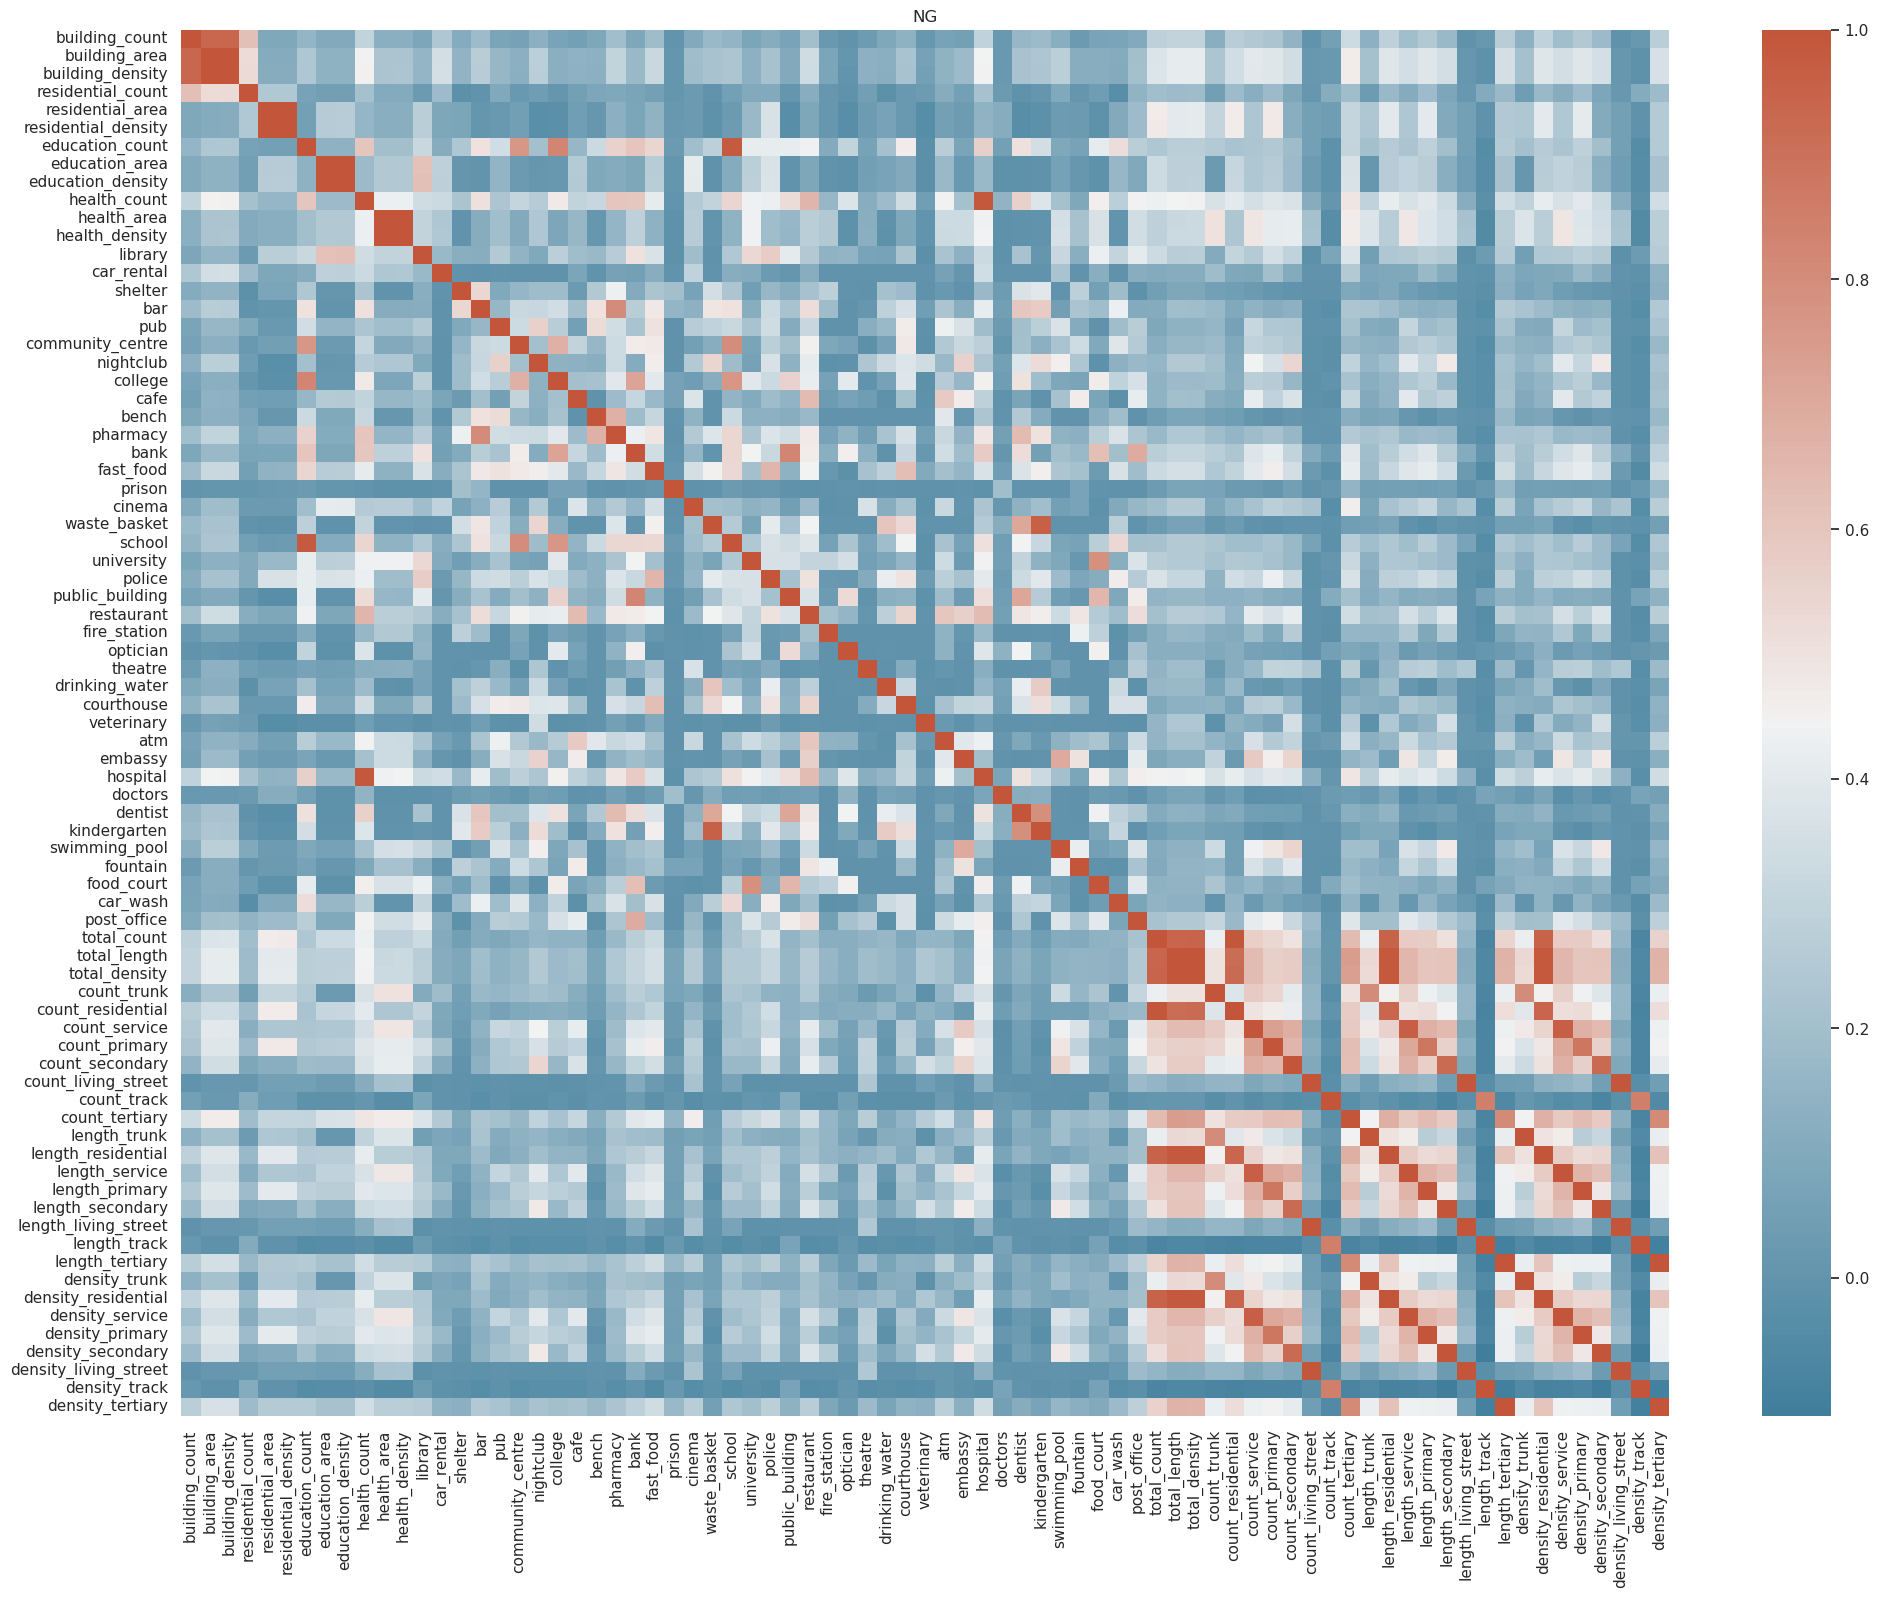

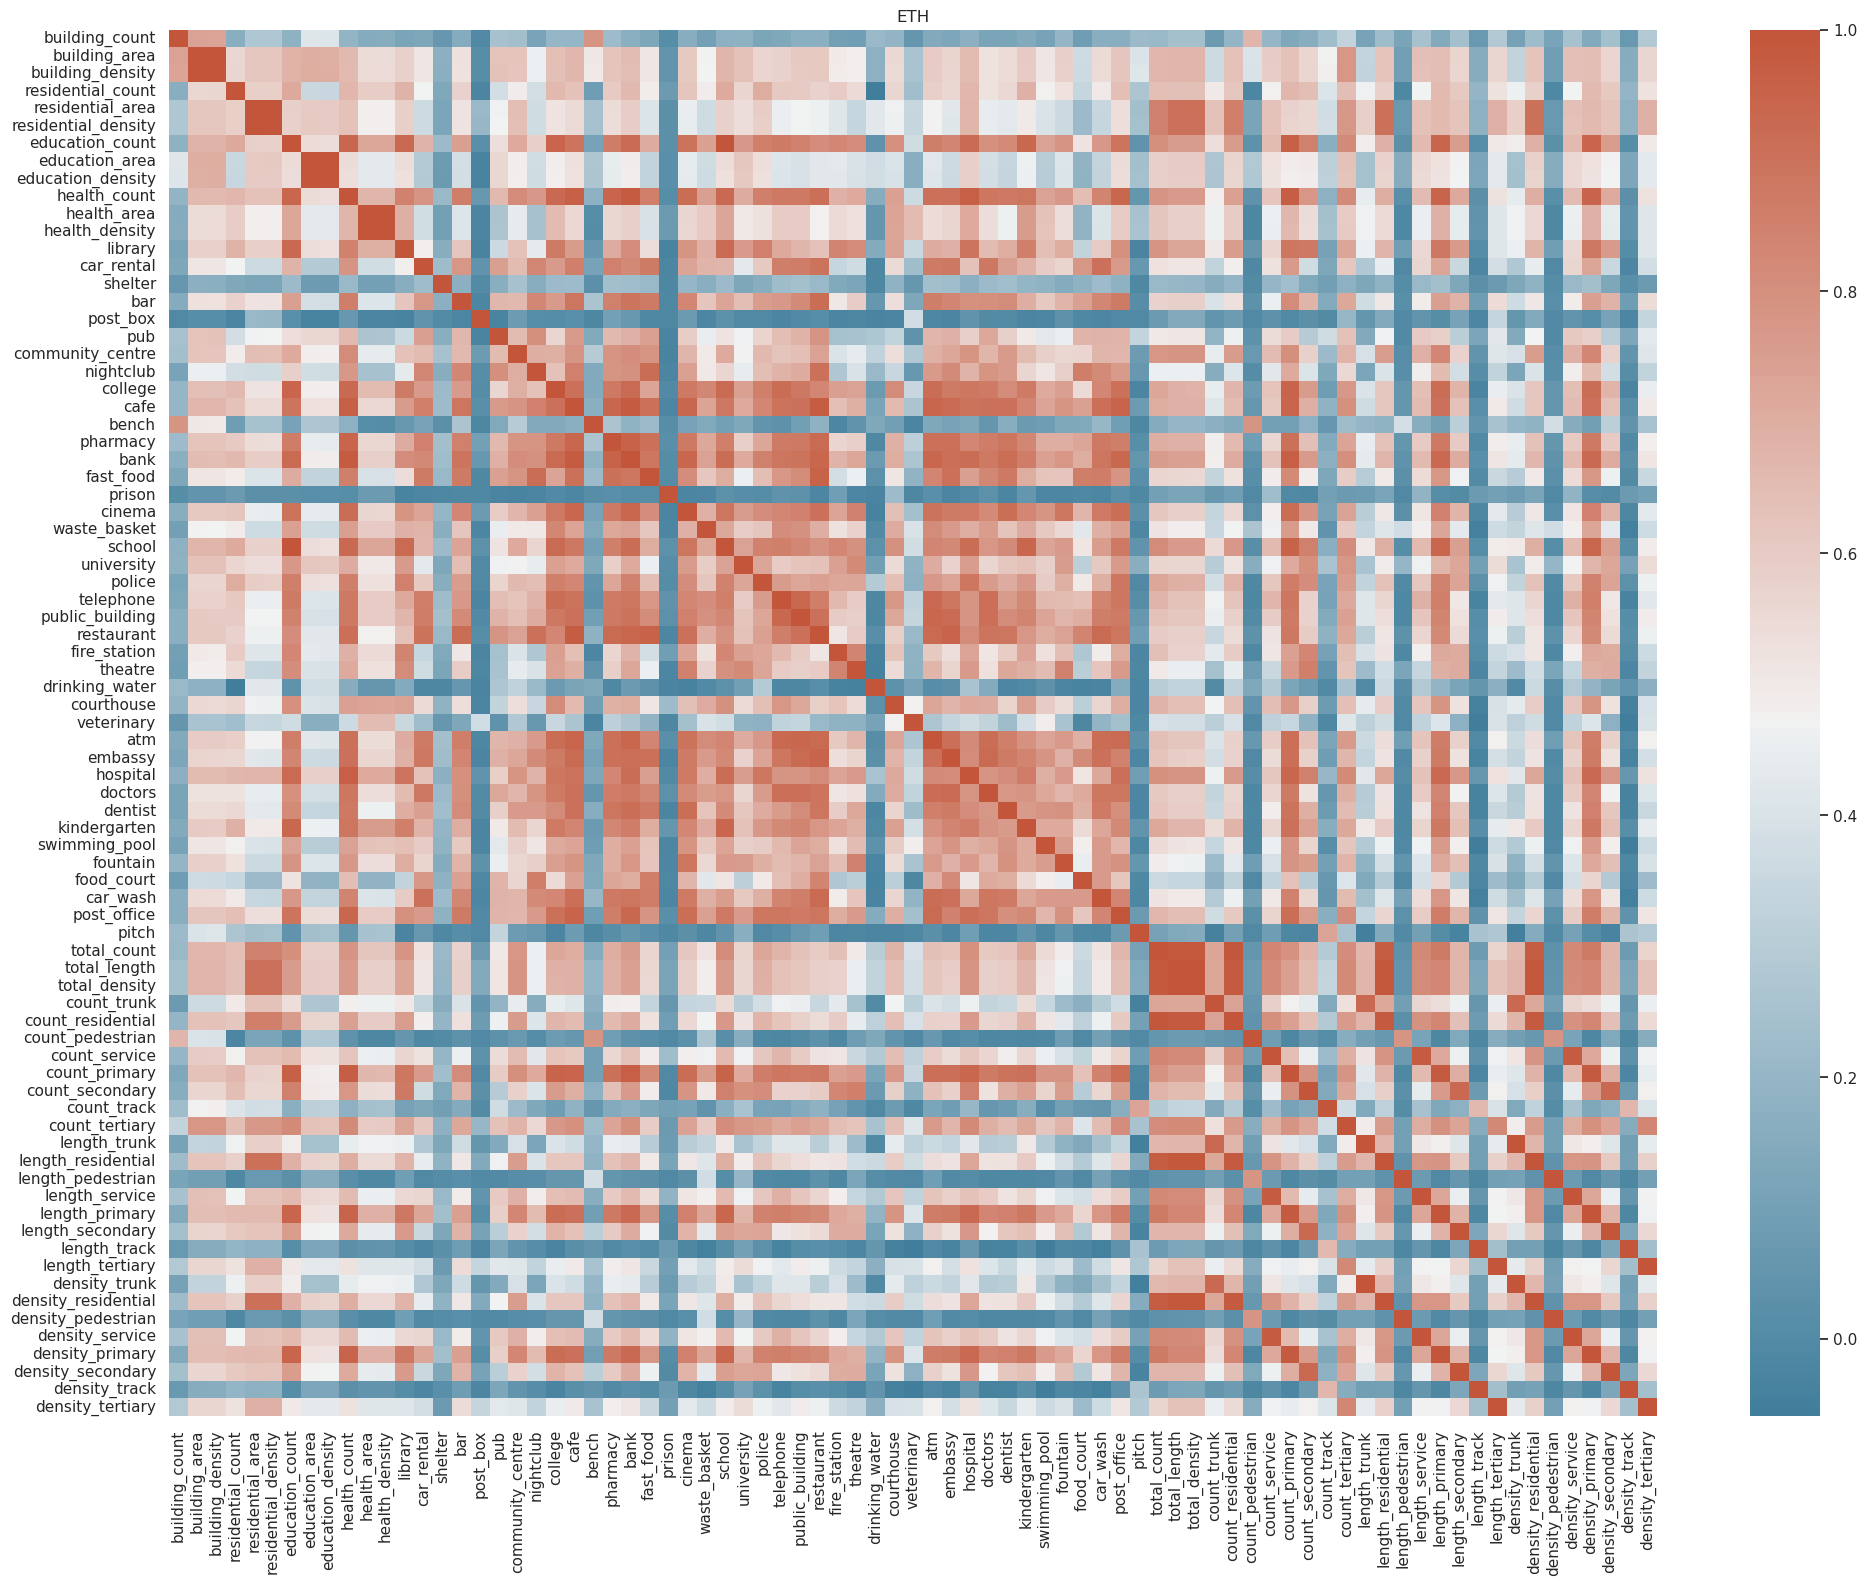

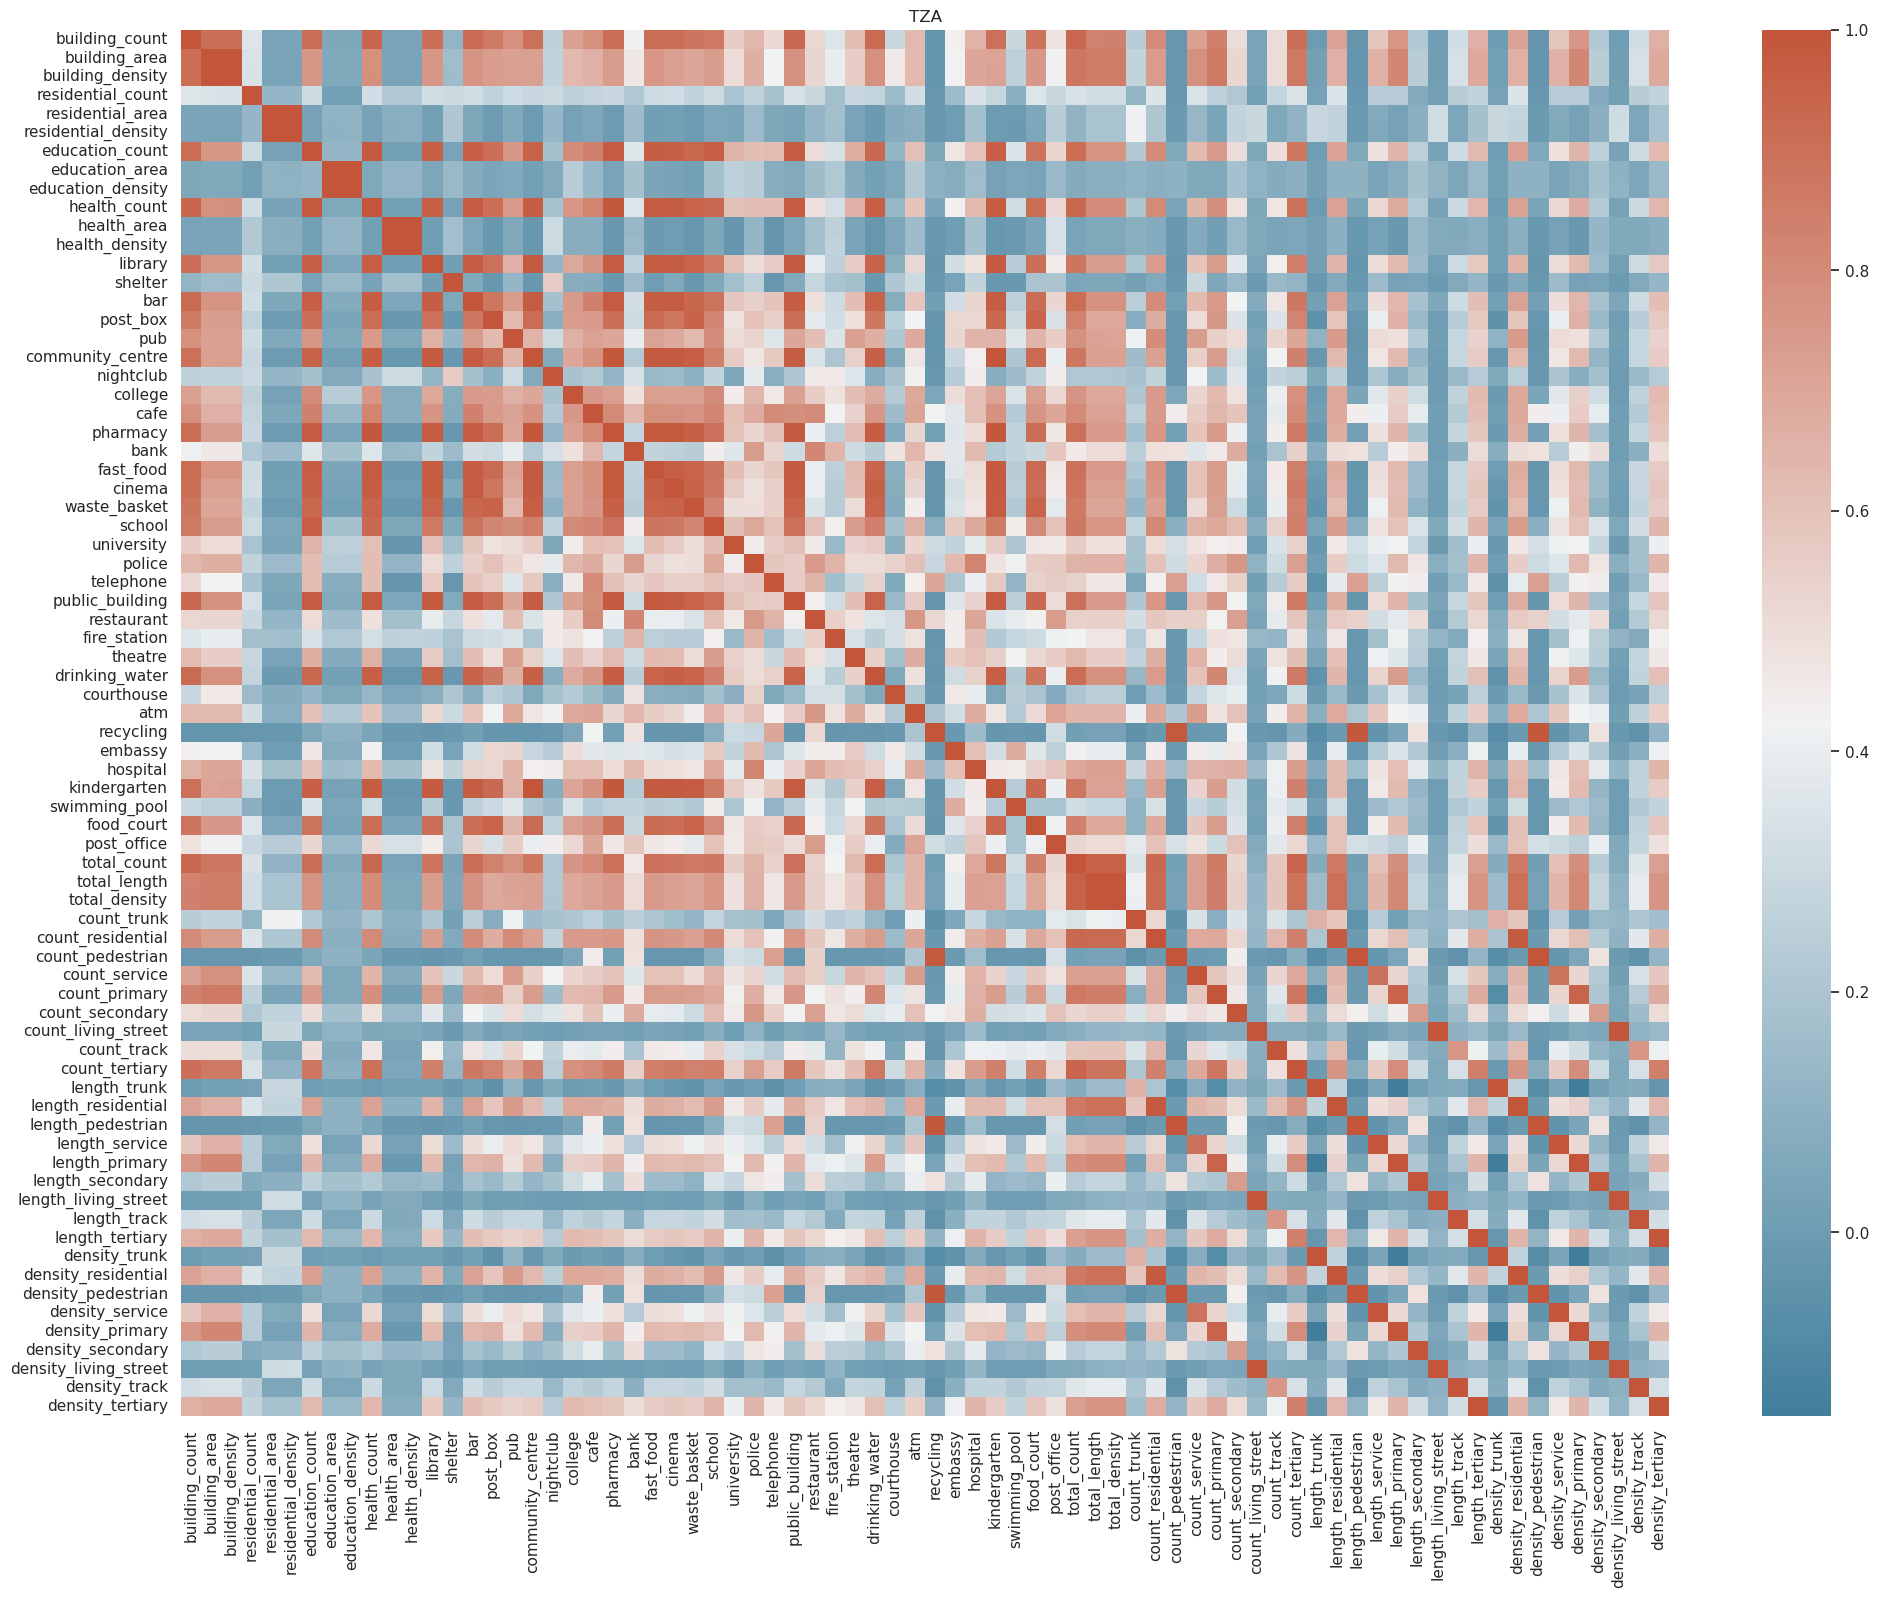

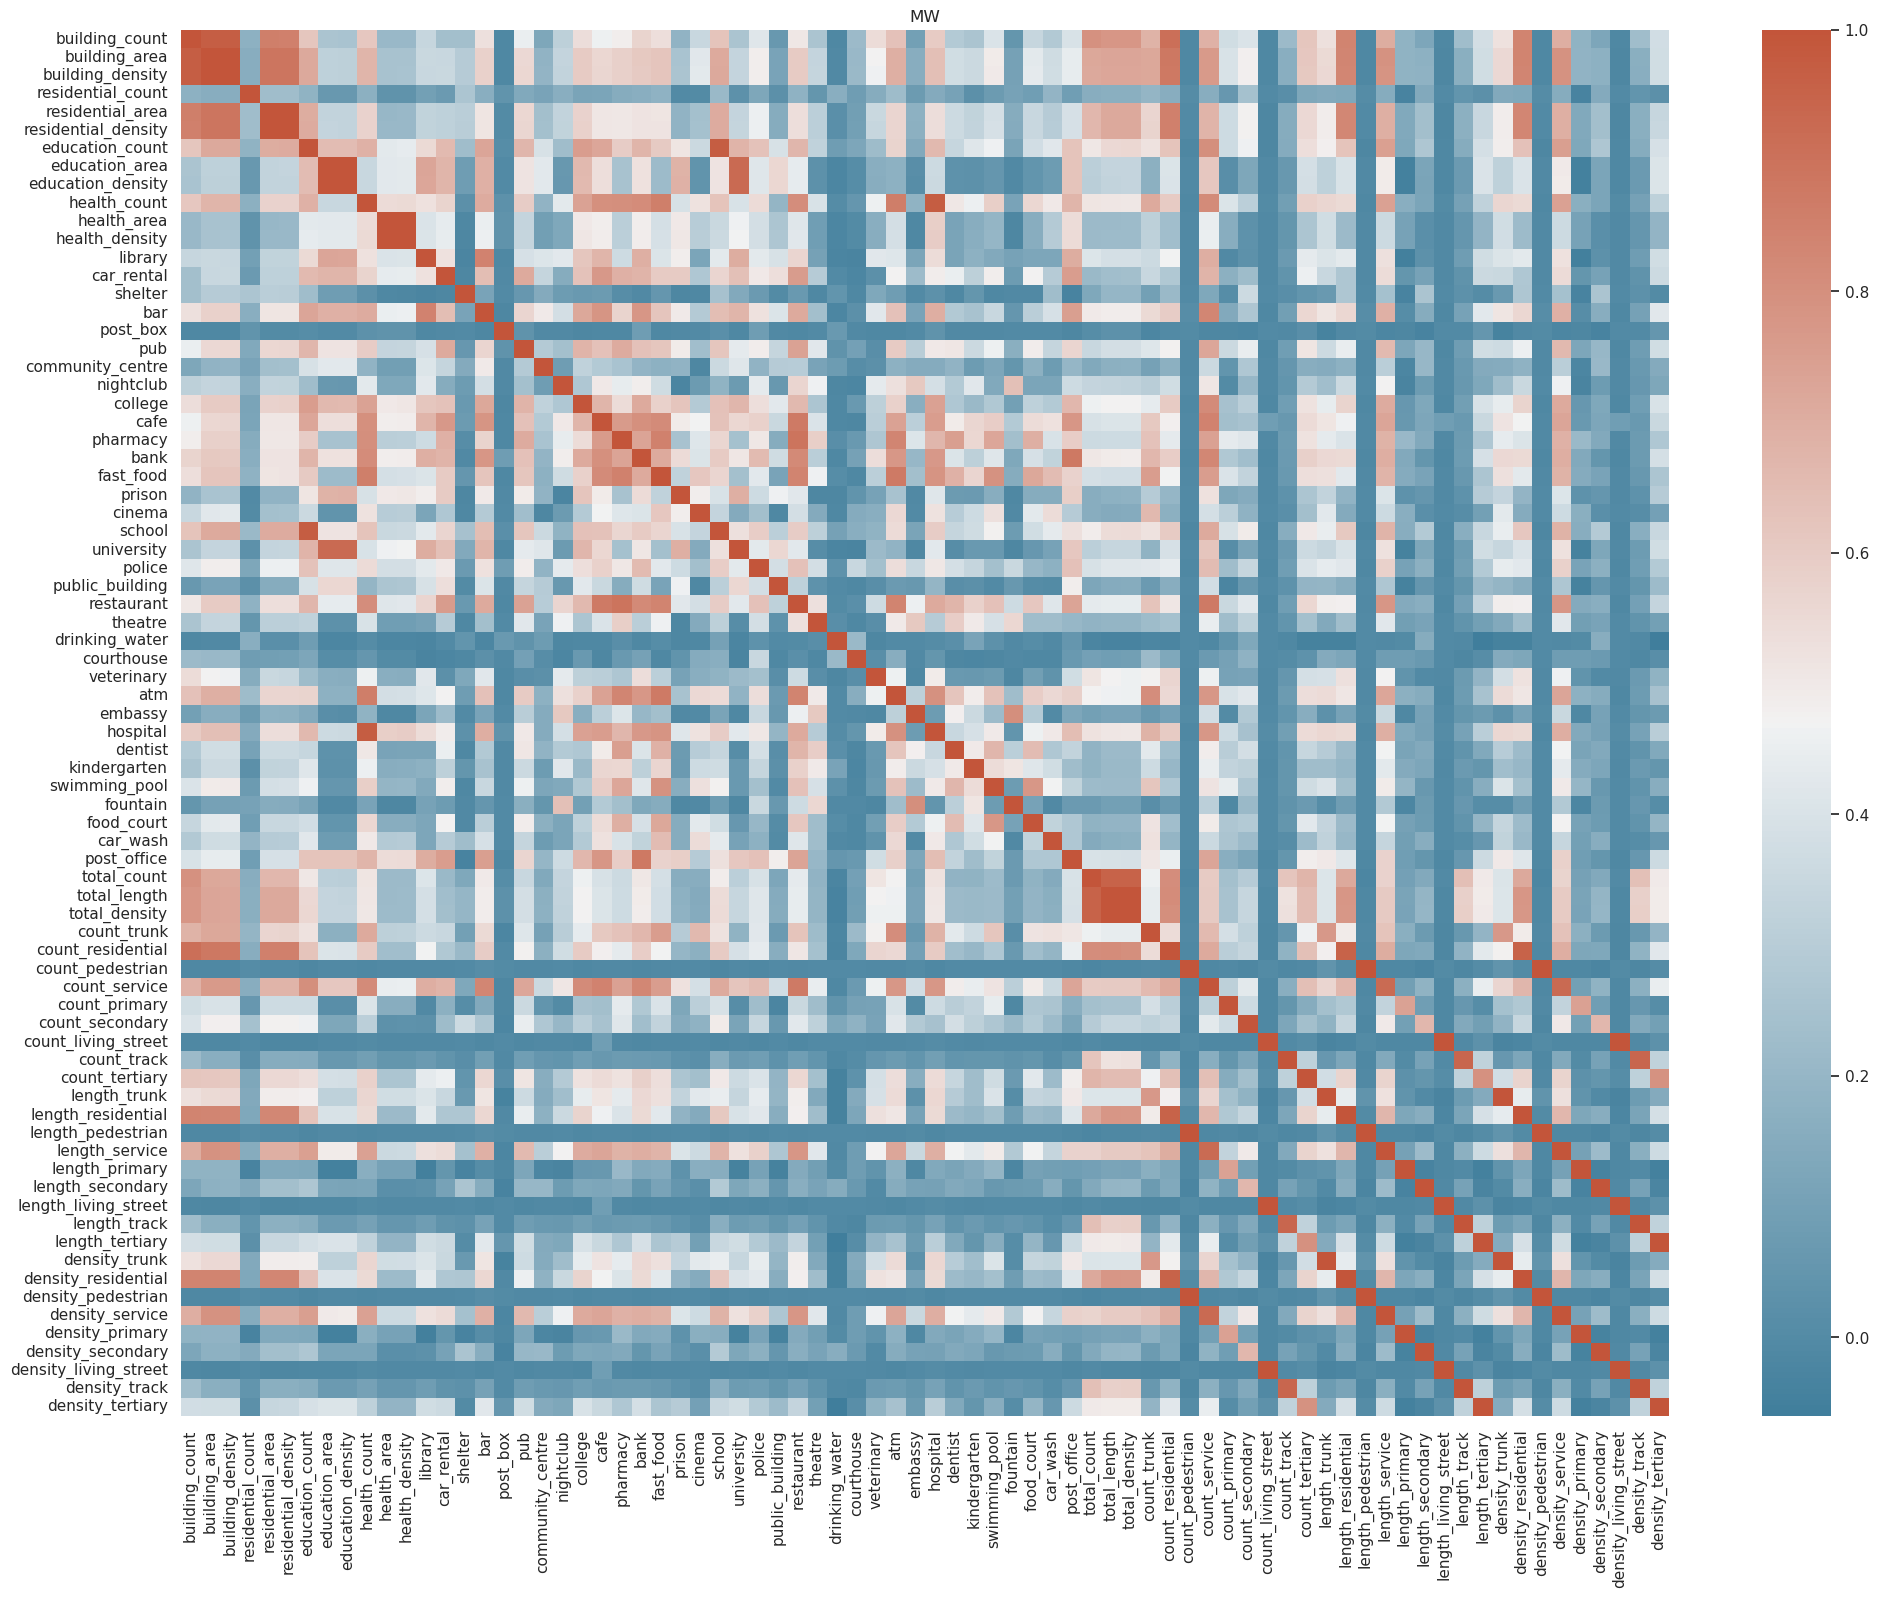

In [18]:
for i, country in enumerate(countries):
    print(country)
    X, y, year_df, osm_X = eu.get_recent_osm_features(complete_df, [country], all_cols)
    osm_X = pd.DataFrame(osm_X, columns = all_cols)
    display(osm_X.describe())
    #remove all features filled with 0
    X = pd.DataFrame(X, columns = all_cols)
    X = X.loc[:, (X != 0).any(axis=0)]

    #create correlation plot
    corr = X.corr()
    f, ax = plt.subplots(figsize=(24, 18))
    ax.set_title(country)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns_plot = sns.heatmap(corr, cmap=cmap)
    sns_plot.figure.savefig("heatmap_"+ country + ".png", dpi = 300)

 25%|██▌       | 1/4 [00:04<00:13,  4.56s/it]

10


 50%|█████     | 2/4 [00:08<00:08,  4.05s/it]

2


 75%|███████▌  | 3/4 [00:10<00:03,  3.40s/it]

18


100%|██████████| 4/4 [00:15<00:00,  3.86s/it]

2


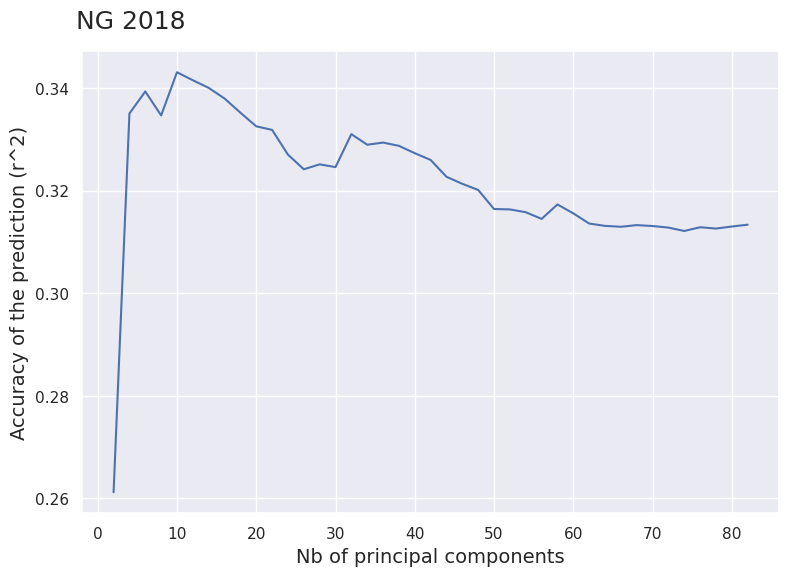

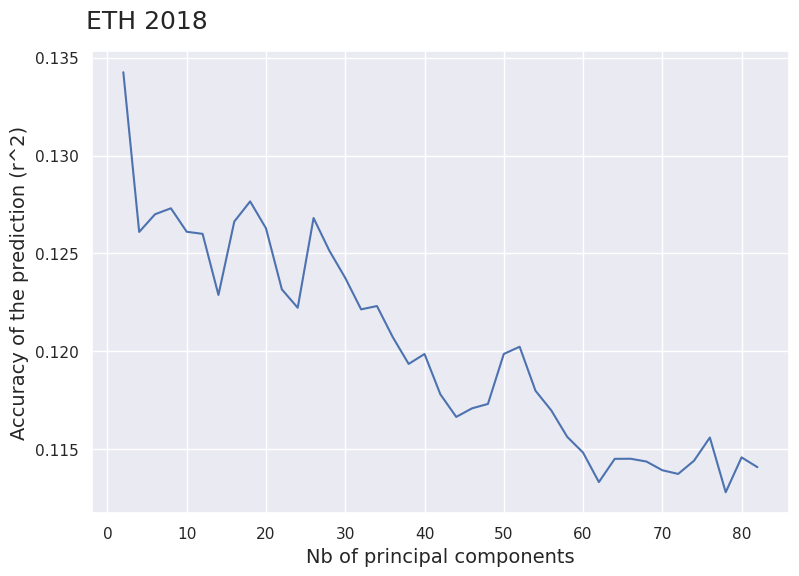

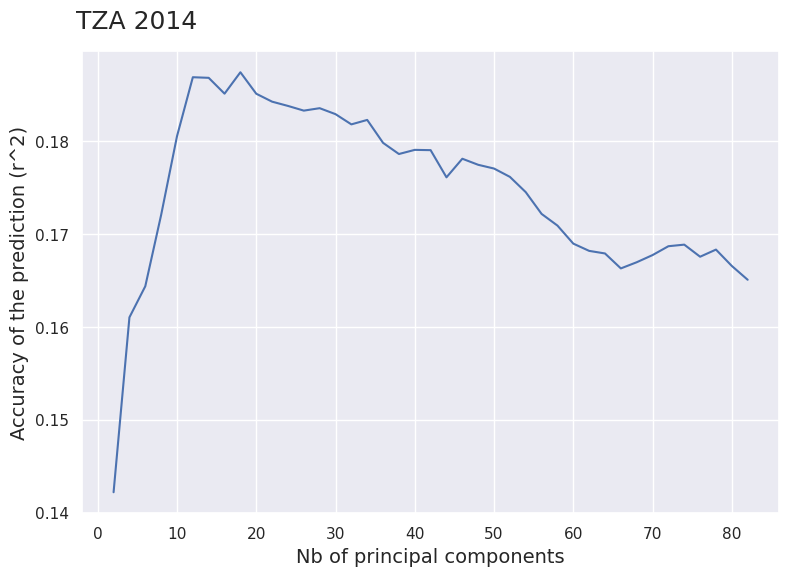

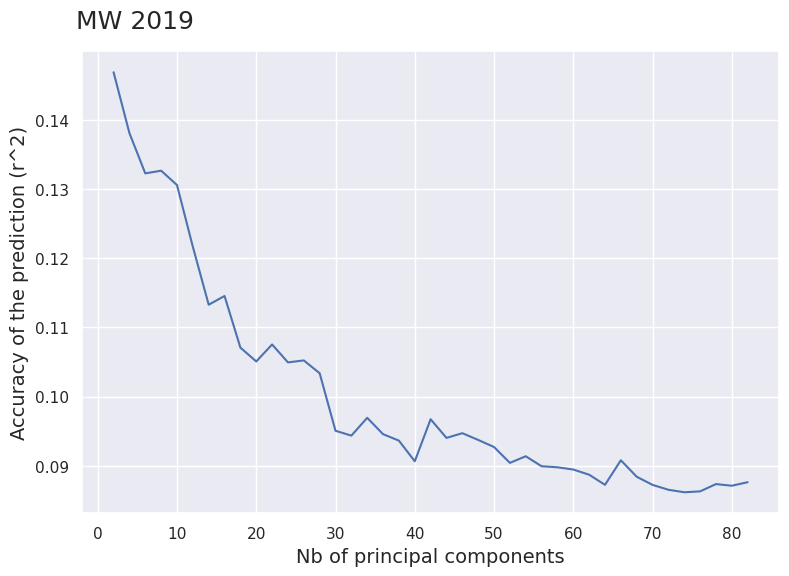

In [32]:
for country in tqdm(countries) :
    accuracy_pca(complete_df, country, Ridge, alpha = 1000)

 25%|██▌       | 1/4 [00:01<00:04,  1.47s/it]

45


 50%|█████     | 2/4 [00:02<00:02,  1.32s/it]

5


 75%|███████▌  | 3/4 [00:03<00:01,  1.19s/it]

15


100%|██████████| 4/4 [00:05<00:00,  1.36s/it]

10


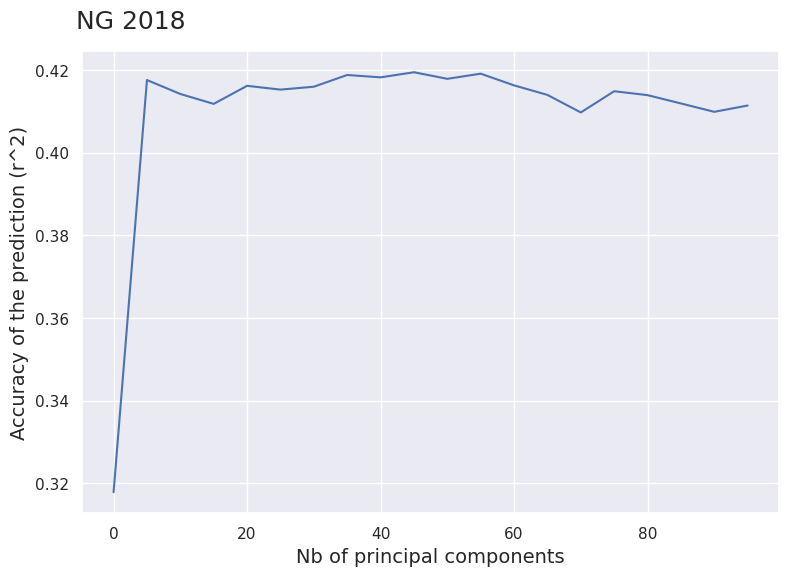

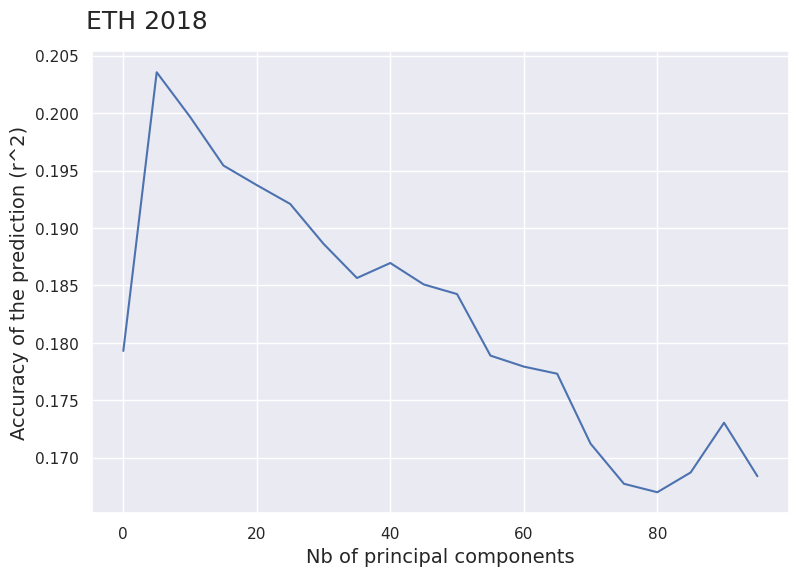

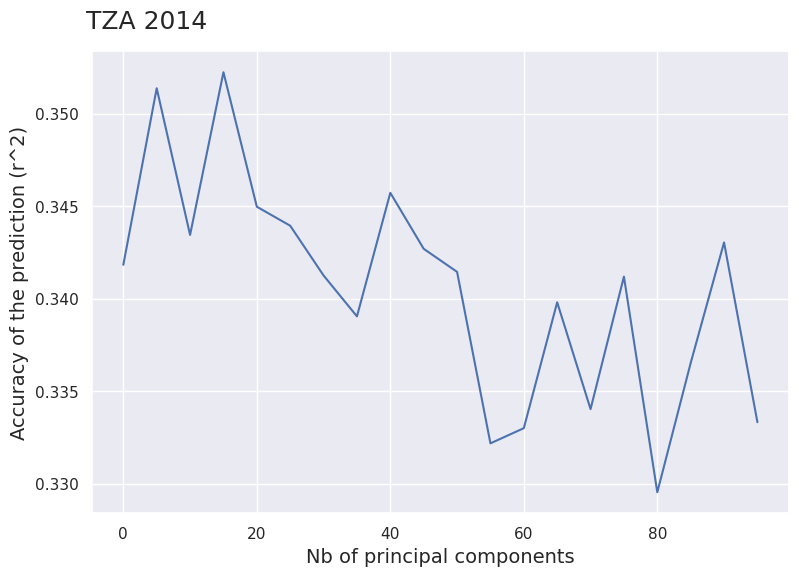

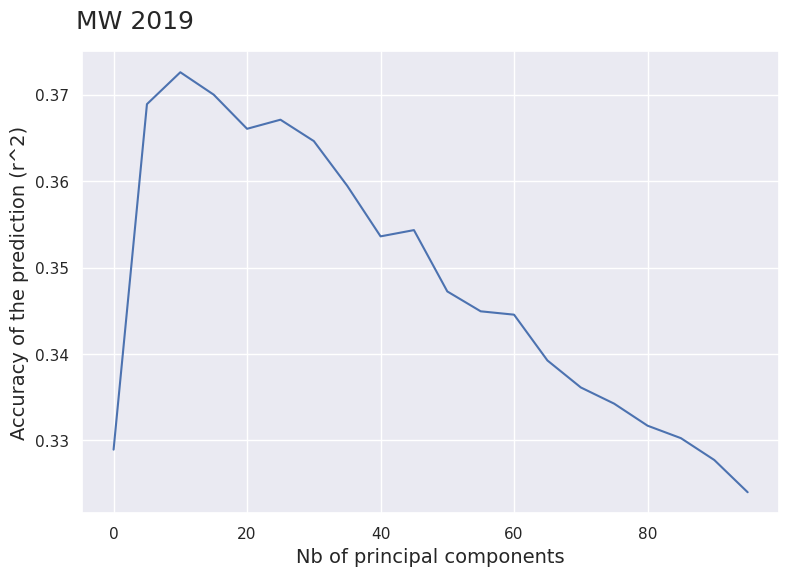

In [33]:
for country in tqdm(countries) :
    accuracy_pca(complete_df, country, Ridge, withOSM= False, alpha = 1000)